In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data4 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GMEData(timestamps).csv")
data4.head(1000)

,High,Low,Open,Close,Volume,Adj Close,timestamp
0,1.617500,1.517500,1.535000,1.577500,17814400.0,1.577500,2020-01-02
1,1.562500,1.460000,1.552500,1.470000,14175600.0,1.470000,2020-01-03
2,1.477500,1.400000,1.450000,1.462500,13579200.0,1.462500,2020-01-06
3,1.457500,1.360000,1.442500,1.380000,20912000.0,1.380000,2020-01-07
4,1.462500,1.352500,1.372500,1.430000,22517600.0,1.430000,2020-01-08
...,...,...,...,...,...,...,...
699,26.299999,23.950001,24.870001,25.270000,4195900.0,25.270000,2022-10-11
700,26.889999,25.270000,25.959999,25.360001,3284400.0,25.360001,2022-10-12
701,26.590000,23.910000,24.420000,25.559999,3516200.0,25.559999,2022-10-13
702,26.370001,24.629999,25.770000,24.629999,2773500.0,24.629999,2022-10-14


In [ ]:
data3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/pbl_dataset(final).csv")
data3.head(100000)

,title,timestamp,Positive,Neutral,Negative
0,itnot about the money itabout sendingmessage,2021-01-28,0.000001,1.000001,0.000001
1,math professor scott steiner says the numbers ...,2021-01-28,0.000001,0.728001,0.272001
2,exit the system,2021-01-28,0.000001,1.000001,0.000001
3,new sec filing for gme can someone less retard...,2021-01-28,0.138001,0.658001,0.204001
4,not to distract from gme just thought our amc ...,2021-01-28,0.119001,0.881001,0.000001
...,...,...,...,...,...
55666,go kathy,2022-10-12,0.000001,1.000001,0.000001
55667,a little hopium goeslong way 11k bullish gain ...,2022-10-12,0.327001,0.673001,0.000001
55668,at firstthought this was one of yall,2022-10-12,0.000001,1.000001,0.000001
55669,what happenedpow you used to be cool,2022-10-12,0.277001,0.723001,0.000001


In [ ]:
inner = pd.merge(data3, data4, on=['timestamp'])

In [ ]:
inner.head(100000)

,title,timestamp,Positive,Neutral,Negative,High,Low,Open,Close,Volume,Adj Close
0,itnot about the money itabout sendingmessage,2021-01-28,0.000001,1.000001,0.000001,120.750000,28.0625,66.250000,48.400002,235263200.0,48.400002
1,math professor scott steiner says the numbers ...,2021-01-28,0.000001,0.728001,0.272001,120.750000,28.0625,66.250000,48.400002,235263200.0,48.400002
2,exit the system,2021-01-28,0.000001,1.000001,0.000001,120.750000,28.0625,66.250000,48.400002,235263200.0,48.400002
3,new sec filing for gme can someone less retard...,2021-01-28,0.138001,0.658001,0.204001,120.750000,28.0625,66.250000,48.400002,235263200.0,48.400002
4,not to distract from gme just thought our amc ...,2021-01-28,0.119001,0.881001,0.000001,120.750000,28.0625,66.250000,48.400002,235263200.0,48.400002
...,...,...,...,...,...,...,...,...,...,...,...
45425,go kathy,2022-10-12,0.000001,1.000001,0.000001,26.889999,25.2700,25.959999,25.360001,3284400.0,25.360001
45426,a little hopium goeslong way 11k bullish gain ...,2022-10-12,0.327001,0.673001,0.000001,26.889999,25.2700,25.959999,25.360001,3284400.0,25.360001
45427,at firstthought this was one of yall,2022-10-12,0.000001,1.000001,0.000001,26.889999,25.2700,25.959999,25.360001,3284400.0,25.360001
45428,what happenedpow you used to be cool,2022-10-12,0.277001,0.723001,0.000001,26.889999,25.2700,25.959999,25.360001,3284400.0,25.360001


In [ ]:
inner = inner.drop(['High','Low','Open','Volume','Adj Close'],axis=1)

In [ ]:
inner.head(100000)

,title,timestamp,Positive,Neutral,Negative,Close
0,itnot about the money itabout sendingmessage,2021-01-28,0.000001,1.000001,0.000001,48.400002
1,math professor scott steiner says the numbers ...,2021-01-28,0.000001,0.728001,0.272001,48.400002
2,exit the system,2021-01-28,0.000001,1.000001,0.000001,48.400002
3,new sec filing for gme can someone less retard...,2021-01-28,0.138001,0.658001,0.204001,48.400002
4,not to distract from gme just thought our amc ...,2021-01-28,0.119001,0.881001,0.000001,48.400002
...,...,...,...,...,...,...
45425,go kathy,2022-10-12,0.000001,1.000001,0.000001,25.360001
45426,a little hopium goeslong way 11k bullish gain ...,2022-10-12,0.327001,0.673001,0.000001,25.360001
45427,at firstthought this was one of yall,2022-10-12,0.000001,1.000001,0.000001,25.360001
45428,what happenedpow you used to be cool,2022-10-12,0.277001,0.723001,0.000001,25.360001


In [ ]:
dict = {'title':['itnot about the money itabout sendingmessage'],
        'timestamp':['2021-01-28'],
        'Positive':[0.000001],
        'Neutral':[1.000001],
        'Negative':[0.000001],
        'Close':[48.400002]
       }

titles = pd.DataFrame(dict)
title=set()
date=[]
#{lst=['gamestop','gme','GME']
#msk = inner['title'].apply(lambda x: not set(x).isdisjoint(lst))
#out = df.loc[msk, 'sentence'].tolist()

for index, row in inner.iterrows():
    if "gamestop" in row['title']:
        title.add(row['title'])
        date.append(row['timestamp'])


In [ ]:
title

{'100k gainam pro musician and convinced my band to recordcover of immigrant song with lyrics about gamestop',
 '2021gamestop odyssey',
 'a gamestop movie reportedly under way by film company mgm',
 'a glimpse into the future after we stick it to the suits gamestop will go down in history',
 'about 2 1 million gamestop shares failed to deliver on jan 26 before falling to 138 179 on jan 29 the day after robinhood and other brokerages began restricting trading in so called meme stocks',
 'according to new data gamestopstock price is being driven by institutions not retail traders',
 'according to reuters yellen says wants to understand deeply gamestop frenzy before taking action anyone else thinking shewaaaay too old to understand this or amtoo cynical',
 'after delisting gamestop and amc robinhood has gotten over 100 000 1 star reviews in one hour on the app store now set with1 rating they deserve it',
 'after the gamestop fiasco momentum builds for an 800 billion tax',
 'alexandria oca

In [ ]:
df = pd.DataFrame(title)

In [ ]:
df.rename(columns = {0:'title'}, inplace = True)

In [ ]:
df.head()

,title
0,if everyone buys and holds gme does that mean ...
1,i didnknow about gamestop until it was to late...
2,canlook up gamestop
3,short sellers made billions froms tech selloff...
4,short sellers made 3 6 bln in profits so far t...


In [ ]:
df['timestamp'] = pd.Series(date)

In [ ]:
df.head()

,title,timestamp
0,if everyone buys and holds gme does that mean ...,2021-01-28
1,i didnknow about gamestop until it was to late...,2021-01-28
2,canlook up gamestop,2021-01-28
3,short sellers made billions froms tech selloff...,2021-01-28
4,short sellers made 3 6 bln in profits so far t...,2021-01-28


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sid = SIA()

df['sentiments']           = df['title'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
df['Positive']   = df['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
df['Neutral']    = df['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
df['Negative']   = df['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

df.drop(columns=['sentiments'],inplace=True)
df.head()

,title,timestamp,Positive,Neutral,Negative
0,if everyone buys and holds gme does that mean ...,2021-01-28,0.000001,1.000001,0.000001
1,i didnknow about gamestop until it was to late...,2021-01-28,0.000001,1.000001,0.000001
2,canlook up gamestop,2021-01-28,0.000001,1.000001,0.000001
3,short sellers made billions froms tech selloff...,2021-01-28,0.000001,0.787001,0.213001
4,short sellers made 3 6 bln in profits so far t...,2021-01-28,0.191001,0.712001,0.097001


In [ ]:
inner2 = pd.merge(df, data4, on=['timestamp'])

In [ ]:
inner2.head()

,title,timestamp,Positive,Neutral,Negative,High,Low,Open,Close,Volume,Adj Close
0,if everyone buys and holds gme does that mean ...,2021-01-28,0.000001,1.000001,0.000001,120.75,28.0625,66.25,48.400002,235263200.0,48.400002
1,i didnknow about gamestop until it was to late...,2021-01-28,0.000001,1.000001,0.000001,120.75,28.0625,66.25,48.400002,235263200.0,48.400002
2,canlook up gamestop,2021-01-28,0.000001,1.000001,0.000001,120.75,28.0625,66.25,48.400002,235263200.0,48.400002
3,short sellers made billions froms tech selloff...,2021-01-28,0.000001,0.787001,0.213001,120.75,28.0625,66.25,48.400002,235263200.0,48.400002
4,short sellers made 3 6 bln in profits so far t...,2021-01-28,0.191001,0.712001,0.097001,120.75,28.0625,66.25,48.400002,235263200.0,48.400002


In [ ]:
inner2 = inner2.drop(['High','Low','Open','Volume','Adj Close'],axis=1)

In [ ]:
inner2.head(1000)

,title,timestamp,Positive,Neutral,Negative,Close
0,if everyone buys and holds gme does that mean ...,2021-01-28,0.000001,1.000001,0.000001,48.400002
1,i didnknow about gamestop until it was to late...,2021-01-28,0.000001,1.000001,0.000001,48.400002
2,canlook up gamestop,2021-01-28,0.000001,1.000001,0.000001,48.400002
3,short sellers made billions froms tech selloff...,2021-01-28,0.000001,0.787001,0.213001,48.400002
4,short sellers made 3 6 bln in profits so far t...,2021-01-28,0.191001,0.712001,0.097001,48.400002
...,...,...,...,...,...,...
605,since robinhood screwed us on gamestop whatnex...,2021-05-06,0.000001,0.758001,0.242001,40.252499
606,can gamestop stock advance continue after92 su...,2021-05-14,0.164001,0.836001,0.000001,39.980000
607,gamestop appoints chief technology officer mor...,2021-05-13,0.000001,1.000001,0.000001,41.125000
608,thatit we are filling4 6 million member class ...,2021-05-18,0.000001,0.644001,0.356001,45.167500


In [ ]:
import seaborn as sns

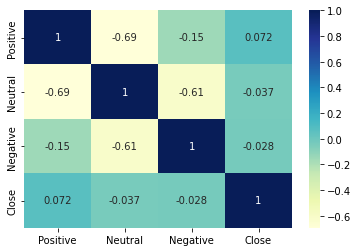

In [ ]:
dataplot = sns.heatmap(inner2.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
inner2.to_csv("GMEClosePriceSentimentData(2020-2022).csv",header = True , encoding = 'utf-8' , index = False)